In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [7]:
df=pd.read_json(r'C:\Users\abhis\Documents\imdb_data\imdb_data\item.json',encoding='utf-8')

In [8]:
def convert_to_numeric(vote):
    if vote==0:
        return 0
    else:
        match = re.search(r'(\d+(\.\d+)?)([KM])', vote)
        if match:
            number = float(match.group(1))
            multiplier = 1000 if match.group(3) == 'K' else 1000000
            return int(number * multiplier)
    
    return None


In [9]:
df['vote'] = df['vote'].apply(convert_to_numeric)

In [10]:
df.shape

(7800, 9)

In [11]:
df['releaseYear'].unique()

array(['2024', '1988', '2025', '2023', '1979', '2015', '2001', '1994',
       '2017', '2012', '1986', '1996', '2022', '2014', '2019', '2007',
       '1972', '2016', '2008', '2000', '1992', '2009', '1997', '1999',
       '2018', '2010', '2003', '1993', '1975', '2013', '2021', '1995',
       '1991', '1985', '2002', '1968', '1984', '2006', '2026', '1990',
       '2004', '1980', '2020', '1983', '1971', '1962', '2005', '1989',
       '1982', '1957', '1998', '1987', '1976', '2011', '1966', '1977',
       '1978', '1974', '1959', '1973', '1960', '1939', '1981', '1956',
       '1954', '1965', '1958', '1942', None, '1964', '1953', '1946',
       '2027', '1927', '1970', '1967', '1922', '1969', '1949', '1934',
       '1941', '1961', '1963', '1950', '1952', '1955', '1947', '1937',
       '1944', '1945', '1943', 'PG-13', '1920', '1931', '1948', '1951',
       '1940', '1933', '1h 36m', '1935', '1932', '1930', '1936', '1915',
       'R', '1938', '2h 15m', '1928', '1926', '1h 5m', '1h 41m', '1924'],
  

In [12]:
df['releaseYear']=pd.to_numeric(df['releaseYear'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        7800 non-null   object 
 1   releaseYear  7706 non-null   float64
 2   desc1        7770 non-null   object 
 3   Meta_score   6253 non-null   float64
 4   duration     7800 non-null   object 
 5   rating       7505 non-null   float64
 6   image        7715 non-null   object 
 7   vote         7348 non-null   float64
 8   rated        7800 non-null   object 
dtypes: float64(4), object(5)
memory usage: 548.6+ KB


In [14]:
df['desc1']=df['desc1'].dropna()
df['rating']=df['rating'].fillna(0)
df['Meta_score']=df['Meta_score'].fillna(0)
df['releaseYear']=df['releaseYear'].fillna(3000)
df['vote']=df['vote'].fillna(0)

In [15]:
df['desc1'].dropna()

0       After a family tragedy, three generations of t...
1       An Indiana family discovers strange, demonic o...
2       The spirits of a deceased couple are harassed ...
3       While scavenging the deep ends of a derelict s...
4       Deadpool is offered a place in the Marvel Cine...
                              ...                        
7795    A young Jewish man develops a fiercely anti-Se...
7796    A college student, branded a loser by his room...
7797    A killer dressed in a police uniform begins mu...
7798    An Edinburgh professor and assorted colleagues...
7799    American seminary student Michael Kovak travel...
Name: desc1, Length: 7770, dtype: object

In [16]:
df[df['desc1'].isna()]

,Title,releaseYear,desc1,Meta_score,duration,rating,image,vote,rated
435,436. Untitled Paul Thomas Anderson Event Film,2025.0,NaN,0.0,Not Relased,0.0,https://m.media-amazon.com/images/M/MV5BMjM1OT...,0.0,Not Rated
910,911. Mortal Kombat 2,2025.0,NaN,0.0,Not Relased,0.0,None,0.0,Not Rated
929,930. Blade,2025.0,NaN,0.0,Not Relased,0.0,https://m.media-amazon.com/images/M/MV5BZDE0ZG...,0.0,Not Rated
1136,1137. The Batman Part II,2026.0,NaN,0.0,Not Relased,0.0,https://m.media-amazon.com/images/M/MV5BMzA0Nm...,0.0,Not Rated
1182,1183. Happy Gilmore 2,3000.0,NaN,0.0,Not Relased,0.0,None,0.0,Not Rated
1910,1911. Untitled Karate Kid Movie,2025.0,NaN,0.0,Not Relased,0.0,https://m.media-amazon.com/images/M/MV5BMTFjMj...,0.0,Not Rated
2139,2140. The Lord of the Rings: The Hunt for Gollum,2026.0,NaN,0.0,Not Relased,0.0,None,0.0,Not Rated
2252,2253. Fast X: Part 2,2026.0,NaN,0.0,Not Relased,0.0,https://m.media-amazon.com/images/M/MV5BMDQxZm...,0.0,Not Rated
2987,2988. The Black Phone 2,2025.0,NaN,0.0,Not Relased,0.0,https://m.media-amazon.com/images/M/MV5BZmY3ZD...,0.0,Not Rated
3634,3635. Lethal Weapon 5,3000.0,NaN,0.0,Not Relased,0.0,https://m.media-amazon.com/images/M/MV5BNjk0ZD...,0.0,Not Rated


In [454]:
df[df['image'].isna()]

,Title,releaseYear,desc1,Meta_score,duration,rating,image,vote,rated
643,644. 28 Years Later,2025.0,"Plot under wraps. The third film in the ""28 Da...",0.0,Not Relased,0.0,None,0.0,Not Rated
741,742. Happy Gilmore 2,3000.0,NaN,0.0,Not Relased,0.0,None,0.0,Not Rated
854,855. The Thursday Murder Club,3000.0,Four septuagenarian friends live in a retireme...,0.0,Not Relased,0.0,None,0.0,Not Rated
938,939. Mortal Kombat 2,2025.0,NaN,0.0,Not Relased,0.0,None,0.0,Not Rated
1393,1394. How to Train Your Dragon,2025.0,Follows a young Viking as he aspires to hunt d...,0.0,Not Relased,0.0,None,0.0,Not Rated
...,...,...,...,...,...,...,...,...,...
6813,6814. Misadventure,3000.0,NaN,0.0,Not Relased,0.0,None,0.0,Not Rated
6843,6844. Sweethearts,2024.0,"Two college freshmen pull a ""Turkey Dump"" and ...",0.0,R,0.0,None,0.0,Not Rated
6908,6909. Untitled the Chronicles of Narnia Netfli...,3000.0,Reboot of Chronicles of Narnia.,0.0,Not Relased,0.0,None,0.0,Not Rated
6954,6955. Den of Thieves 2: Pantera,2025.0,Plot unknown. A sequel to the 2018 film 'Den o...,0.0,Not Relased,0.0,None,0.0,Not Rated


In [17]:
df1=df[df['releaseYear']<=2024]

In [18]:
df1.isna().sum()

Title          0
releaseYear    0
desc1          0
Meta_score     0
duration       0
rating         0
image          5
vote           0
rated          0
dtype: int64

In [19]:
rated=df1['rated'].value_counts().reset_index()
rated

,rated,count
0,R,3083
1,PG-13,1739
2,Not Rated,1001
3,PG,968
4,Approved,231
5,TV-MA,174
6,G,171
7,Unrated,79
8,TV-14,58
9,NC-17,31


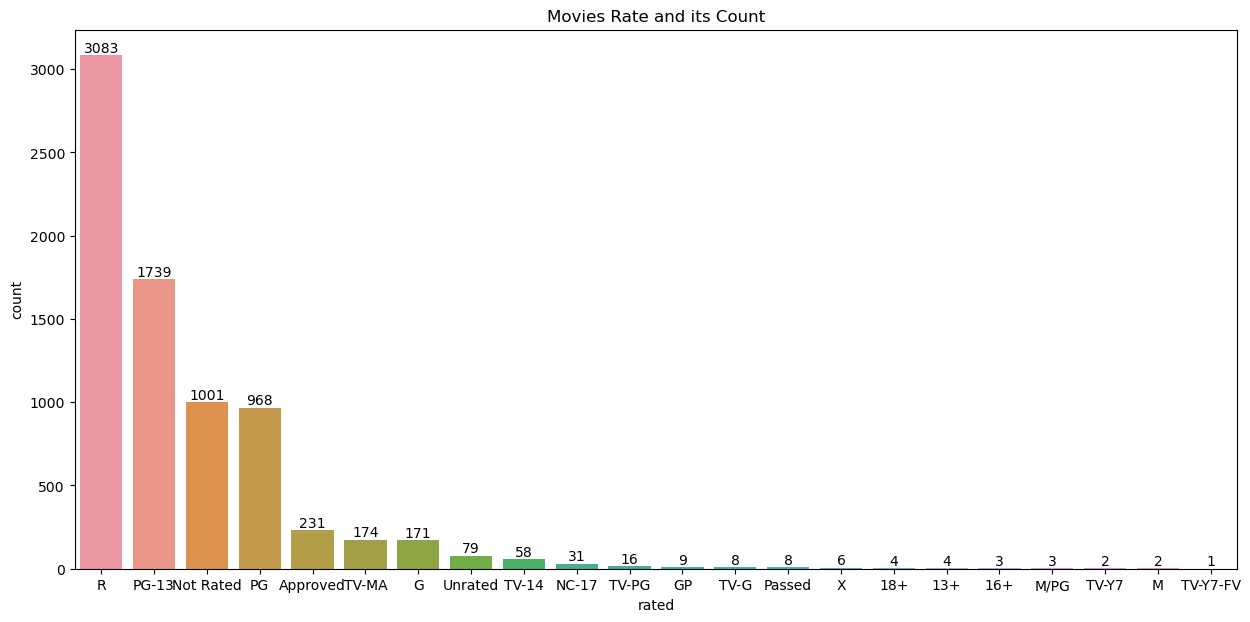

In [20]:
plt.figure(figsize=(15, 7))
sns.barplot(x="rated", y="count", data=rated)

for i, value in enumerate(rated['count']):
    plt.text(i, value + 0.2, str(value), ha='center', va='bottom')
plt.title("Movies Rate and its Count")    
plt.show()

In [21]:
relaesed_year=df1['releaseYear'].value_counts().reset_index().rename(columns={'count':'Movie_Count'})
relaesed_year=relaesed_year.sort_values(by='Movie_Count', ascending=False).head(20)

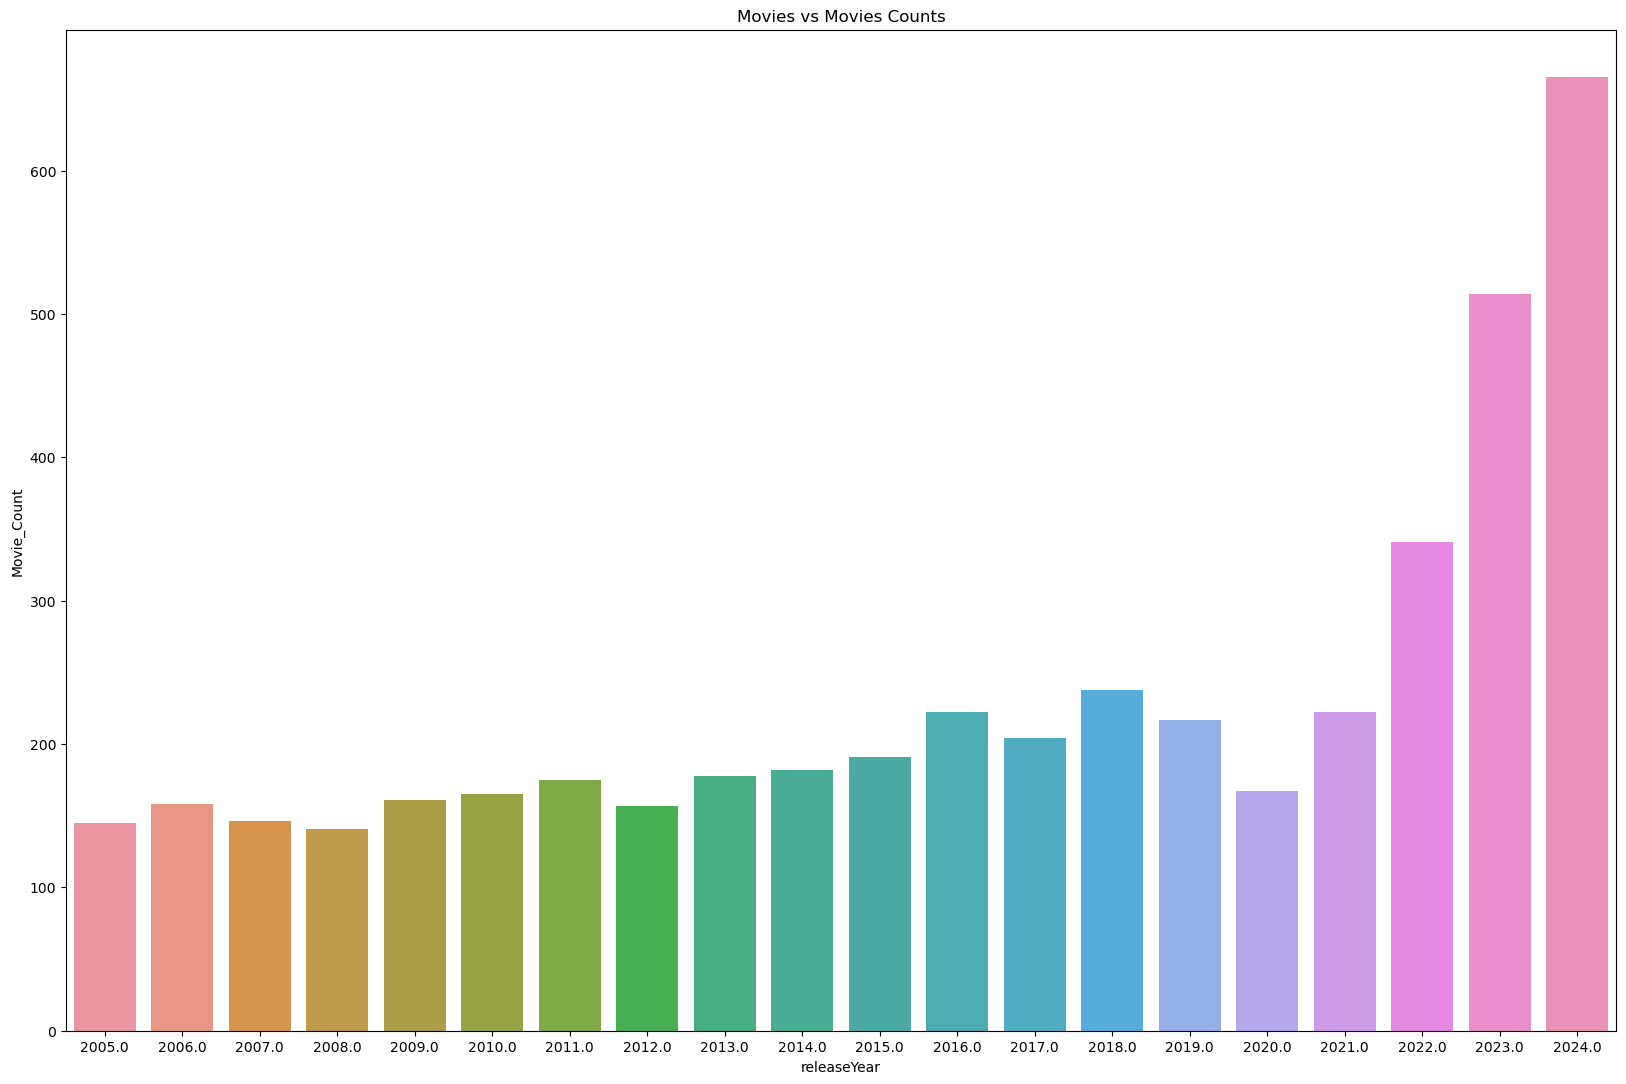

In [22]:
plt.figure(figsize=(20, 13))
sns.barplot(x="releaseYear", y="Movie_Count", data=relaesed_year)


plt.title("Movies vs Movies Counts")    
plt.show()

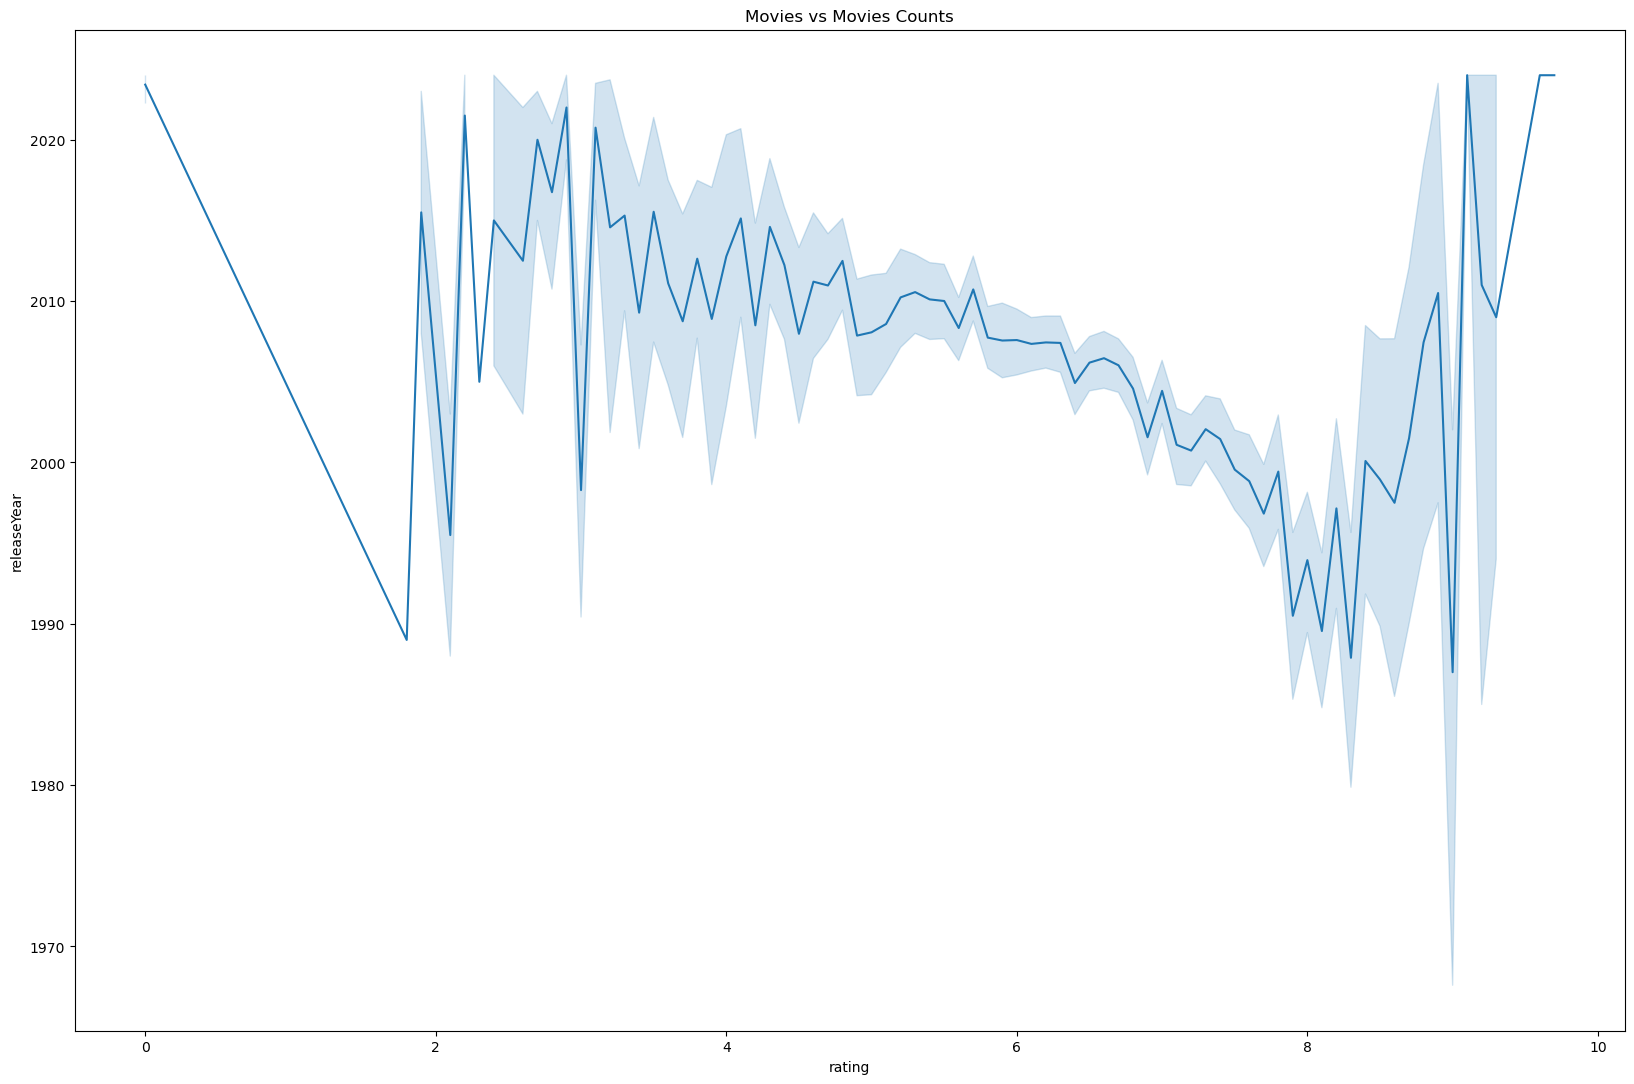

In [23]:
plt.figure(figsize=(20, 13))
sns.lineplot(x="rating", y="releaseYear", data=df1)


plt.title("Movies vs Movies Counts")    
plt.show()

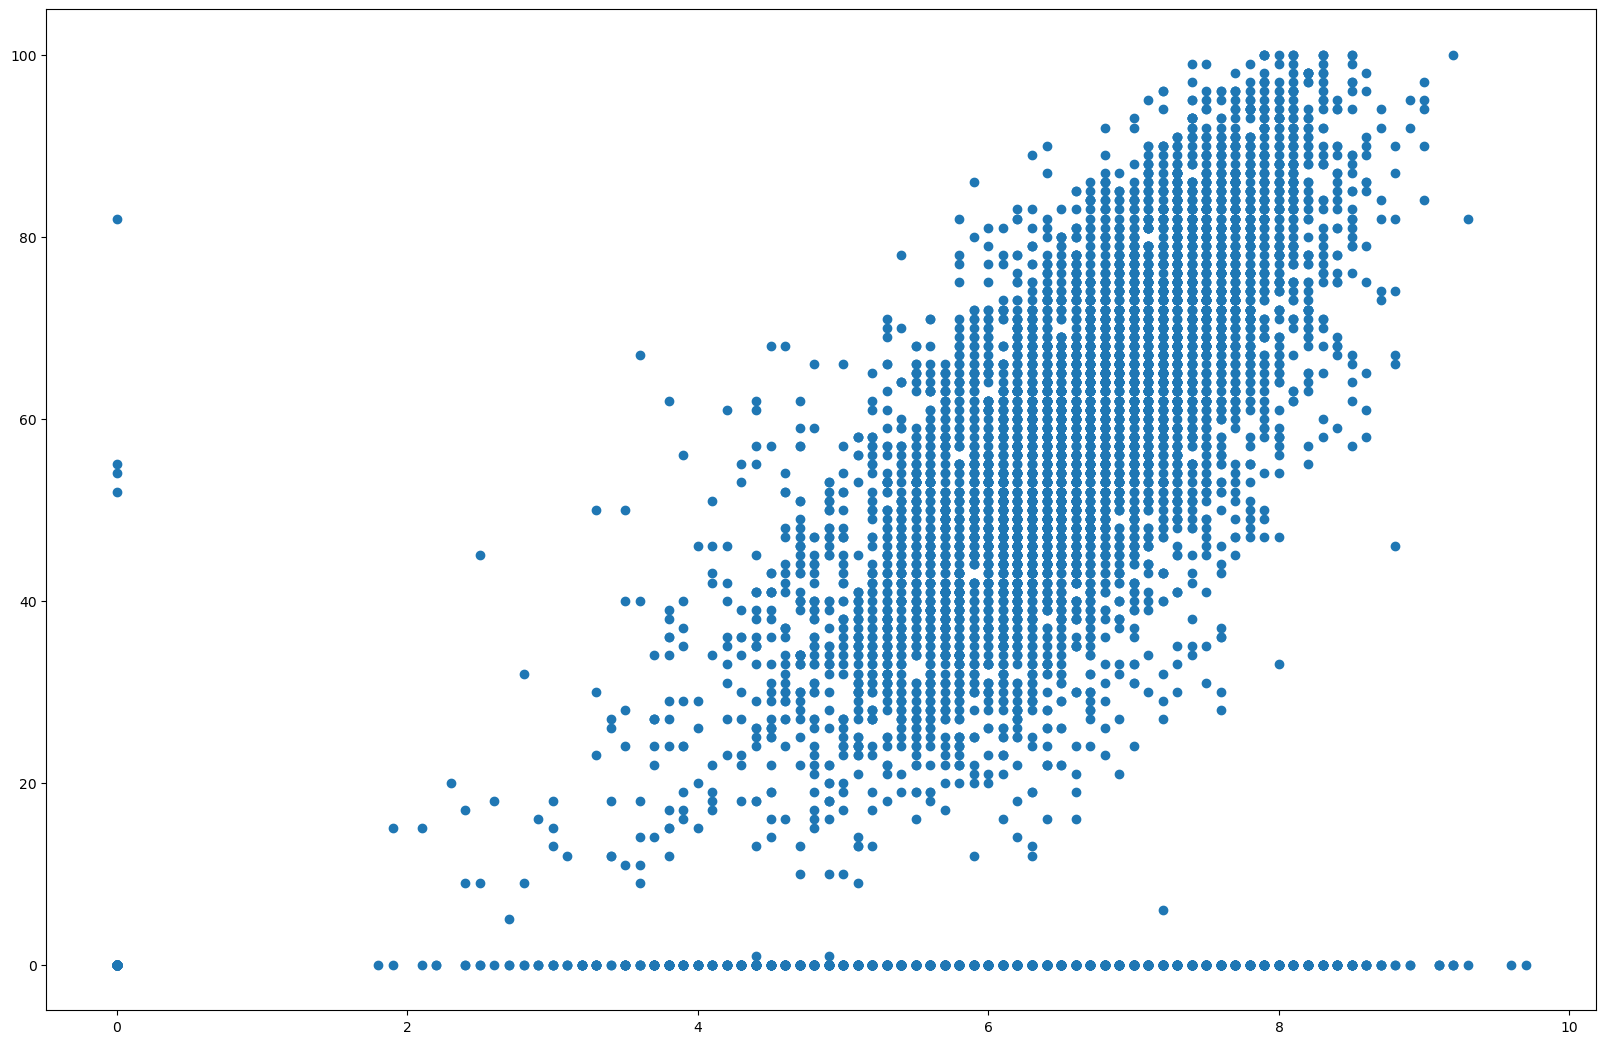

In [24]:
plt.figure(figsize=(20, 13))

x=df1['rating']
y=df1['Meta_score']
plt.scatter(x,y)

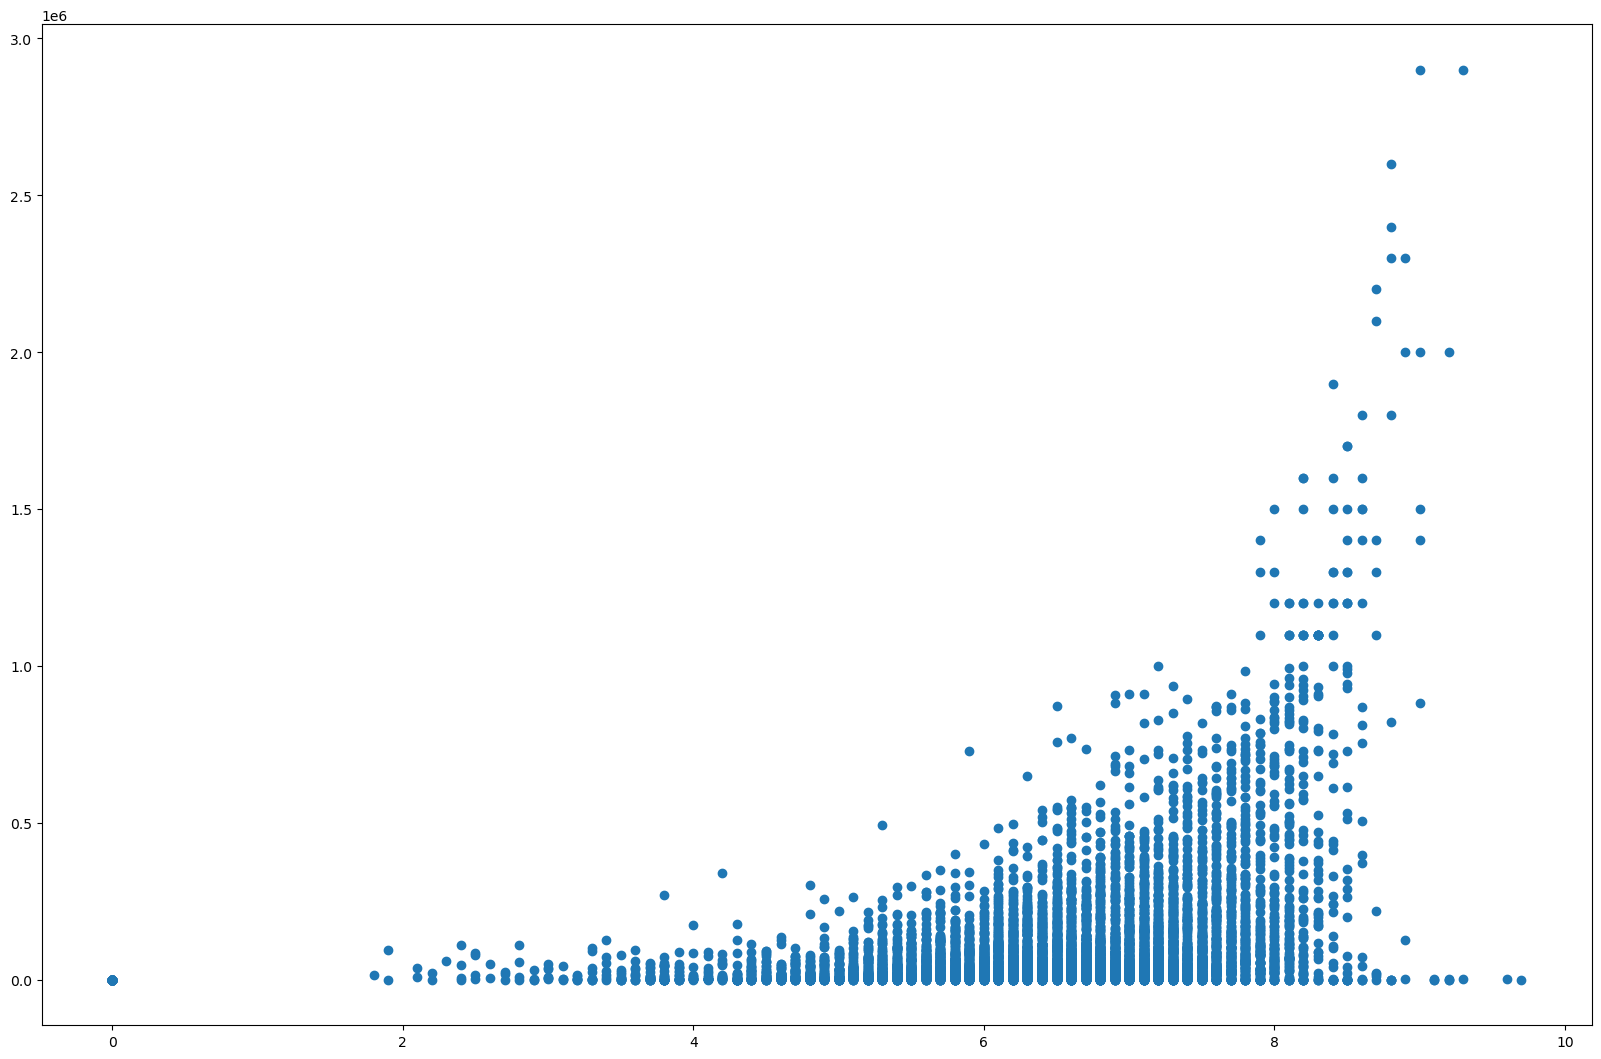

In [25]:
plt.figure(figsize=(20, 13))

x=df1['rating']
y=df1['vote']
plt.scatter(x,y)

<Axes: >

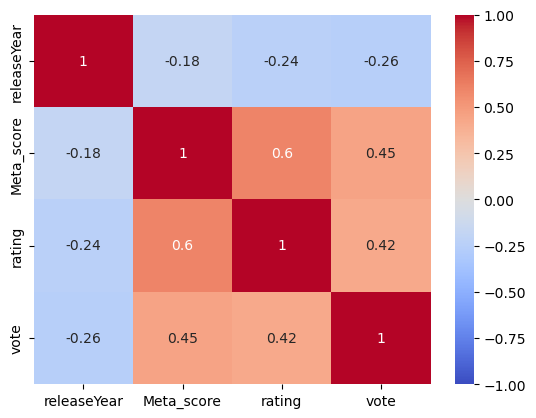

In [26]:
movie_corr=['releaseYear','Meta_score','rating','vote']
movie_corr=df1[movie_corr].corr(method='spearman')
sns.heatmap(movie_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


In [27]:
df1.to_csv('mve.csv',index=False)

C:\Users\abhis\AppData\Local\Temp\ipykernel_5044\2146319122.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


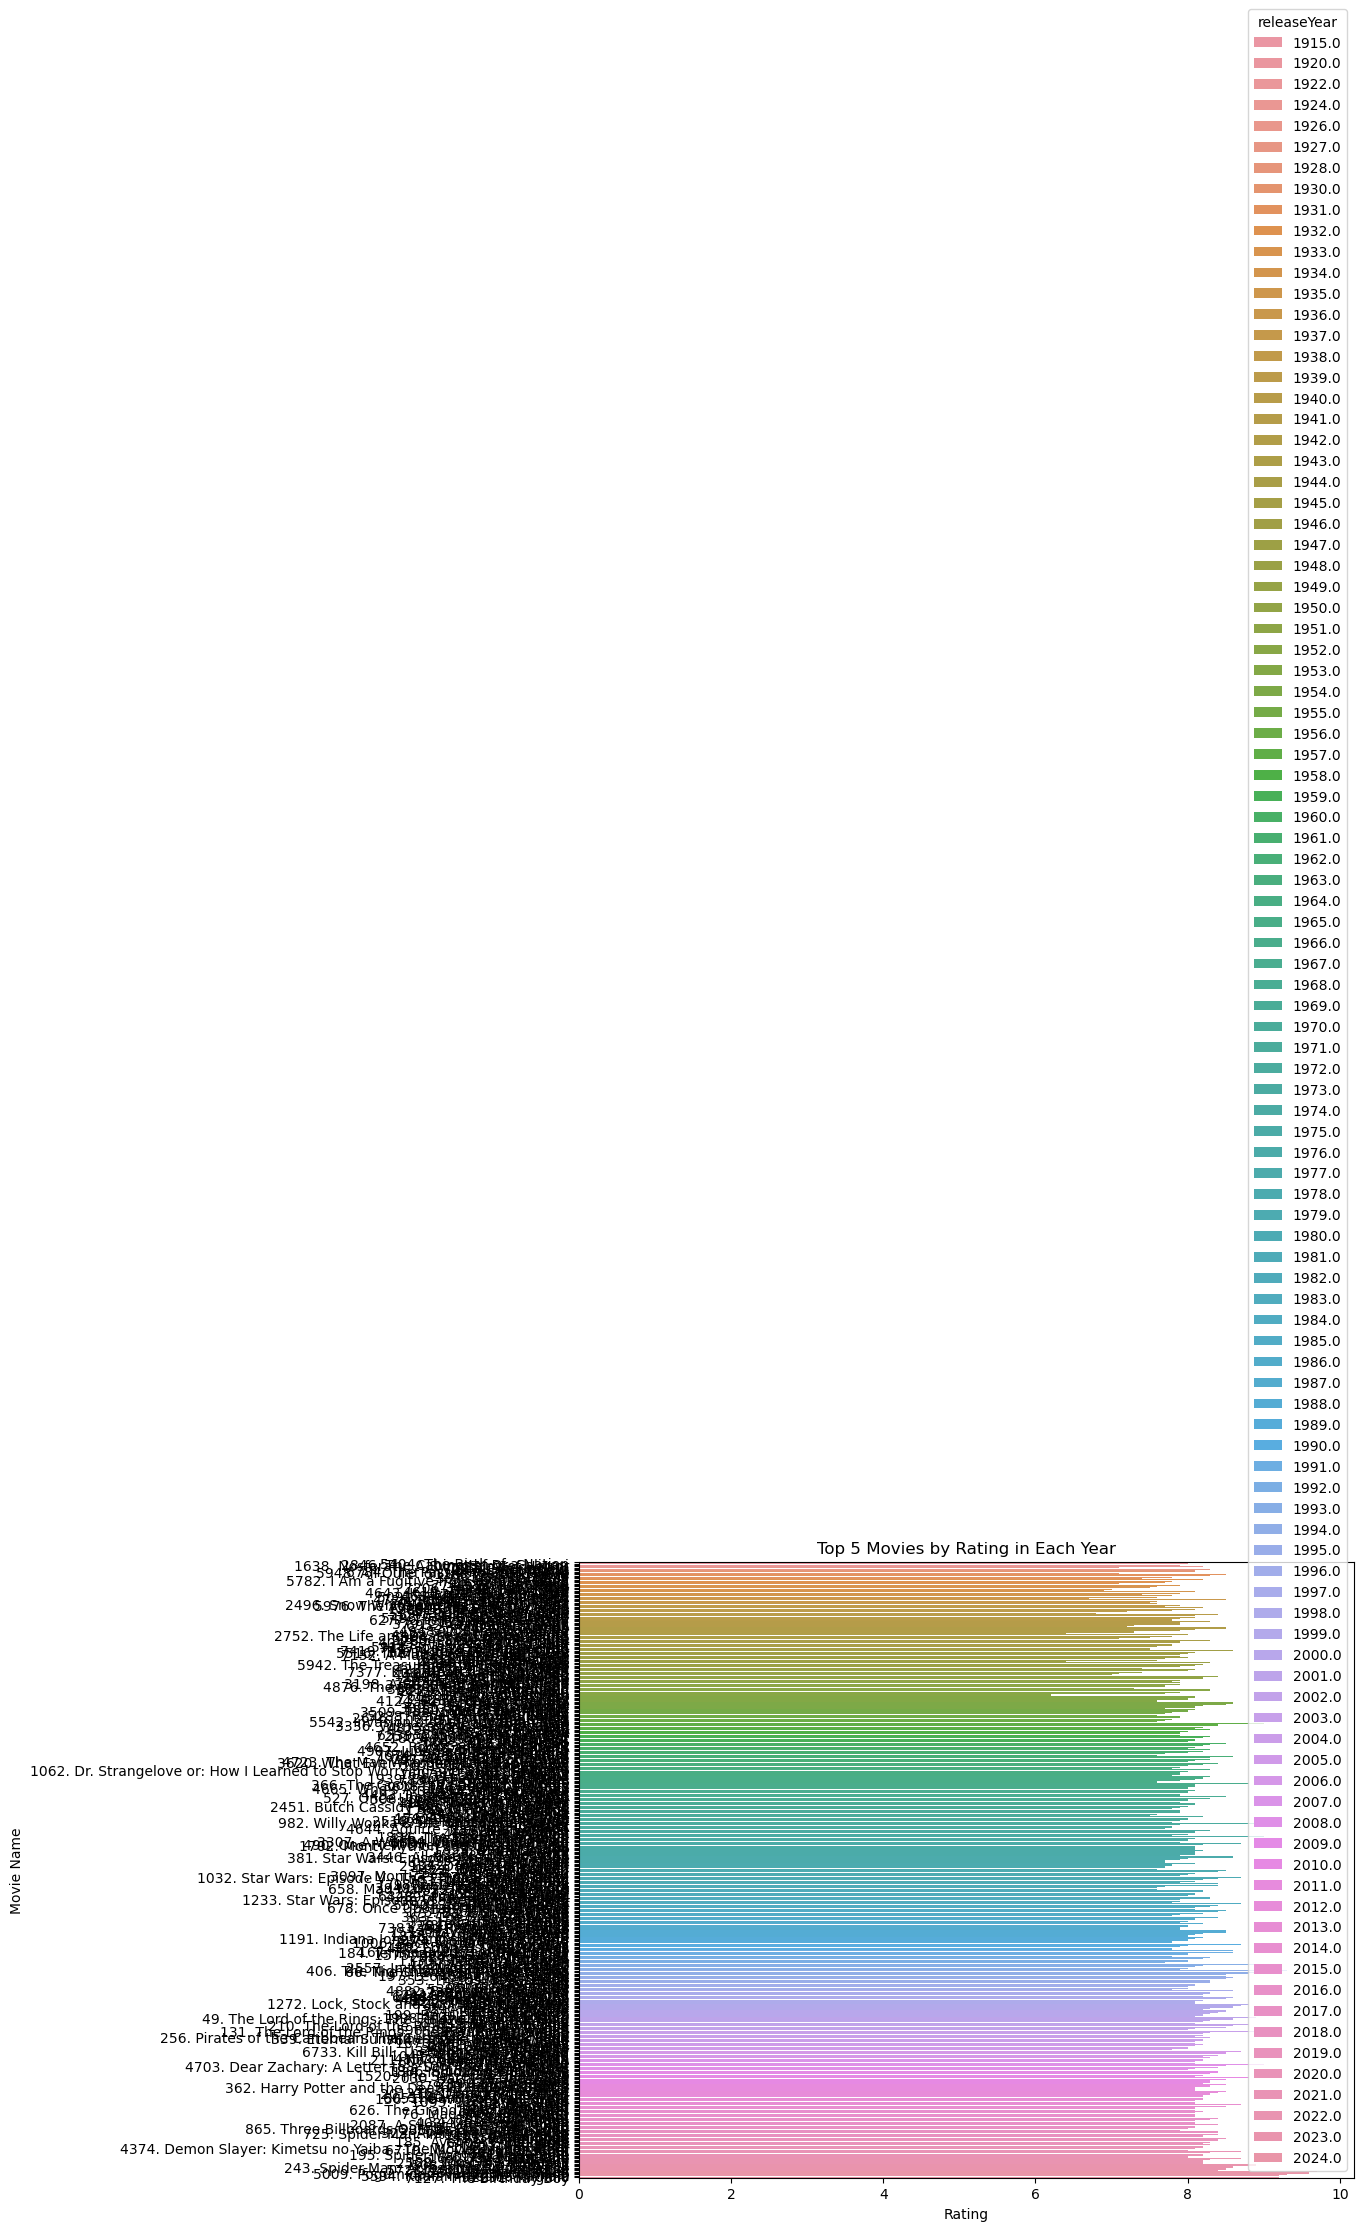

In [28]:
df_sorted = df1.sort_values(by=['releaseYear', 'rating'], ascending=[True, False])
top_5_movies_per_year = df_sorted.groupby('releaseYear').head(5)
plt.figure(figsize=(10, 8))
sns.barplot(x='rating', y='Title', hue='releaseYear', data=top_5_movies_per_year, dodge=False)
plt.title('Top 5 Movies by Rating in Each Year')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.tight_layout()
plt.show()
